# Numerical Solutions to Initial Value Problems: Solution to Challenges

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def simple_projectile_motion_closed_form(time, v0, theta, mass, little_g=9.81):
    """ Calculates Eqn (10) and (11)
    
    Parameters
    ----------
    time: array
        An array of times (in seconds) at which to calculate the values
    v0: float
        The initial speed (in m/s) of the projectile
    theta: float
        The initial angle (in radians) of the projectile
    mass: float
        The mass (in kg) of the projectile
    little_g: float
        The local acceleration due to gravity (in m/s^2)
        
    Returns
    -------
    x(t), z(t): arrays
        A tuple of arrays with length equal to the input time array
    """
    x_of_t = v0 * np.cos(theta) * time
    z_of_t = v0 * np.sin(theta) * time - 0.5 * little_g * time ** 2
    return x_of_t, z_of_t


def sdot_simple_projectile_motion(t, s):
    """ Implementation of Eq (2) for simple projectile motion (Eq 5 and 6)
    
    Parameters
    ----------
    t: array of length N
        The N times (in seconds) to evaluate sdot
    s: array of length 4
        The values of s(t) = [x, z, xdot, zdot]
        
    Returns
    -------
    sdot: array of length 4
        The values of sdot(t) = [xdot, zdot, xddot, zddot]
    """
    xdot = s[2]
    zdot = s[3]
    xddot = 0
    zddot = - little_g
    return np.array([xdot, zdot, xddot, zddot])

<div class="alert alert-block alert-danger">
<b>Challenge 1:</b> Implement Euler's method as described above, a template function is given below which you should use. 
</div>

In [12]:
def eulers_method(t0, s0, sdot, h, stopping_time):
    """ Implementation of Euler's method
    
    Parameters
    ----------
    t0: float
        The initial time in seconds
    s0: array of length 4
        The initial position s(t_0) = [x_0, z_0, xdot_0, zdot_0]
    sdot: function
        A function with the same input/output as `sdot_simple_projectile_motion()`.
    h: float
        The stepping time in seconds
    stopping_time: float
        The time at which to stop integrating
        
    Returns
    -------
    x_of_t, z_of_t: a tuple of arrays or lists
        The estimated solution for s0 in x and z
    """
    #TBD
    return x_of_t, z_of_t

<div class="alert alert-block alert-success">
<b>Solution to Challenge 1:</b> 
</div>

In [13]:
def eulers_method(t0, s0, sdot, h, stopping_time):
    """ Implementation of Euler's method
    
    Parameters
    ----------
    t0: float
        The initial time in seconds
    s0: array of length 4
        The initial position s(t_0) = [x_0, z_0, xdot_0, zdot_0]
    sdot: function
        A function with the same input/output as `sdot_simple_projectile_motion()`.
    h: float
        The stepping time in seconds
    stopping_time: float
        The time at which to stop integrating
        
    Returns
    -------
    x_of_t, z_of_t: a tuple of arrays or lists
        The estimated solution for s0 in x and z
    """
    t = t0
    s_of_t = [s0]
    while t <= stopping_time:
        snp1 = s_of_t[-1] + h * sdot(t, s_of_t[-1])
        t += h
        s_of_t.append(snp1)
    return np.array(s_of_t)[:, 0], np.array(s_of_t)[:, 1]

<div class="alert alert-block alert-danger">
<b>Challenge 2:</b> Verify that your implementation of Euler's solution visually agreed with the exact solution by plotting the result 
</div>

<div class="alert alert-block alert-success">
<b>Solution to Challenge 2:</b> 
</div>

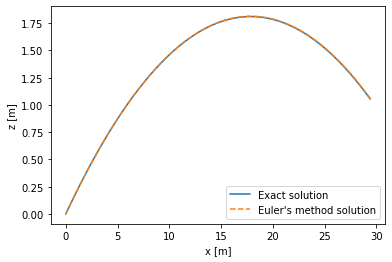

In [17]:
# Define our variables
theta = 0.2
mass = 1
v0 = 30
little_g = 9.81
t0 = 0
stopping_time = 1
h = 1e-3

s0 = np.array([0, 0, v0 * np.cos(theta), v0 * np.sin(theta)])
x_of_t_euler, z_of_t_euler = eulers_method(t0, s0, sdot_simple_projectile_motion, h, stopping_time)

time = np.linspace(0, 1, 100)
x_of_t, z_of_t = simple_projectile_motion_closed_form(time, v0, theta, mass)

fig, ax = plt.subplots()
ax.plot(x_of_t, z_of_t, label="Exact solution")
ax.plot(x_of_t_euler, z_of_t_euler, ls='--', label="Euler's method solution")
ax.set(xlabel="x [m]", ylabel="z [m]")
ax.legend()
plt.show()

<div class="alert alert-block alert-danger">
<b>Challenge 3:</b> Calculate the Mean Squared Error (MSE) between your solutions and the exact solution
</div>

<div class="alert alert-block alert-danger">
<b>Challenge 4:</b> Show that the MSE reduces as a function of the time step `h`
</div>

## Projectile Motion with Drag

The simple projectile motion problem above can easily be modified to take account of drag (also known as air resistance) by adding a second force to the net force experience by the projectile: 
$$ \mathbf{F} = -mg \hat{z} + \mathbf{F}_{d}\,. $$
For an object weighing a few kilograms passing through air, the drag force can be modelled as
$$ \mathbf{F}_d = -\frac{1}{2}\rho  C_d A |\mathbf{v}|^2 \frac{\mathbf{v}}{|\mathbf{v}|}\, $$
Where $\rho$ is the density of the fluid, $\mathbf{v}$ is the velocity of the object, $A$ is the cross-sectional area, and $C_d$ is a drag coefficient parameterising the shape of the object (for a sphere $C_d=0.47$).

<div class="alert alert-block alert-danger">
<b>Challenge 5:</b> Derive the Initial Value Problem (i.e. $\dot{\mathbf{s}}(t)=f(t, \mathbf{s}(t))$ for projectile motion with drag
</div>

<div class="alert alert-block alert-success">
<b>Solution to Challenge 5:</b> 
</div>

$$ m \ddot{\mathbf{r}} = -mg \hat{z} - \epsilon \mathbf{v} $$

$$ \ddot{x} = -\frac{\epsilon}{m} \dot{x} $$

$$ \ddot{z} = -gz -\frac{\epsilon}{m} \dot{z} $$


$$ \mathbf{y} = \left[\begin{array}{c} x \\ z \\ \dot{x} \\ \dot{z} \end{array}\right] $$

$$ \dot{\mathbf{y}} = \left[\begin{array}{c} \dot{x} \\ \dot{z} \\ \ddot{x} \\ \ddot{z} \end{array}\right] =\left[\begin{array}{c} \dot{x} \\ \dot{y} \\ -\frac{\epsilon}{m} \dot{x} \\ -gz -\frac{\epsilon}{m} \dot{z} \end{array}\right] $$

<div class="alert alert-block alert-danger">
<b>Challenge 6:</b> Using `solve_ivp`, solve the projectile motion problem for a mass... TBD
</div>

<div class="alert alert-block alert-success">
<b>Solution to Challenge 6:</b> 
</div>

<div class="alert alert-block alert-danger">
<b>Challenge 7:</b> Increase the time and explain the behaviour
</div>

<div class="alert alert-block alert-success">
<b>Solution to Challenge 7:</b> 
</div>

<div class="alert alert-block alert-danger">
<b>Challenge 7:</b> Read the documentation of `solve_ivp` and introduce an `event` to stop the integration when it hits the floor
</div>

<div class="alert alert-block alert-success">
<b>Solution to Challenge 7:</b> 
</div>

In [ ]:
from scipy.integrate import solve_ivp

epsilon = 2
mass = 1
little_g = 9.8

def ydot(t, y):
    z = y[1]
    xdot = y[2]
    zdot = y[3]
    xddot = - epsilon / mass * xdot
    zddot = - little_g * z - epsilon / mass * zdot
    return np.array([xdot, zdot, xddot, zddot])

v0 = 10
theta = np.radians(45)
y0 = [0, 0.1, v0 * np.cos(theta), v0 * np.sin(theta)]
t_span = (0, 10)
t_eval = np.linspace(0, 10, 1000)
def hit_the_floor(t, y):
    return y[1]
hit_the_floor.terminal = True
output = solve_ivp(ydot, t_span, y0, t_eval=t_eval, events=[hit_the_floor])